# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/forecast?"+ "&APPID=" + api_key+"&units=imperial"

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

city_number=1
set_number=1
city_name=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind=[]

for city in cities:
    query_url=base_url+"&q=" + city 
    weather_json=requests.get(query_url).json()
    
    try:
        city_name.append(city)
        cloudiness.append(weather_json["list"][0]["clouds"]["all"])
        country.append(weather_json["city"]["country"])
        date.append(weather_json["list"][0]["dt"])
        humidity.append(weather_json["list"][0]["main"]["humidity"])
        lat.append(weather_json["city"]["coord"]["lat"])
        lng.append(weather_json["city"]["coord"]["lon"])
        max_temp.append(weather_json["list"][0]["main"]["temp_max"])
        wind.append(weather_json["list"][0]["wind"]["speed"])
        print(f"Processing Record {city_number} of Set {set_number} | {city}")
        print(query_url)
    
        if city_number>=49:
            set_number+=1
            city_number=1
        else:
            city_number+=1
    
    except (KeyError):
        print("City not found. Skipping...")
        city_name.remove(city)
                    
print(f"-----------------------------")
print("Data Retrieval Complete")
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | port alfred
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=port alfred
Processing Record 2 of Set 1 | quatre cocos
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=quatre cocos
Processing Record 3 of Set 1 | meulaboh
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=meulaboh
Processing Record 4 of Set 1 | pevek
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=pevek
Processing Record 5 of Set 1 | belyy yar
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=belyy yar
Processing Record 6 of Set 1 | hermanus
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=hermanus
Processing 

Processing Record 3 of Set 2 | fuxin
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=fuxin
Processing Record 4 of Set 2 | port elizabeth
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=port elizabeth
Processing Record 5 of Set 2 | mehamn
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=mehamn
City not found. Skipping...
Processing Record 6 of Set 2 | ranau
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=ranau
Processing Record 7 of Set 2 | vila velha
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=vila velha
Processing Record 8 of Set 2 | east london
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=east london
Processing Record 9 of Set 2 | cherskiy
ht

Processing Record 8 of Set 3 | novo aripuana
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=novo aripuana
Processing Record 9 of Set 3 | rimbey
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=rimbey
Processing Record 10 of Set 3 | west bay
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=west bay
Processing Record 11 of Set 3 | puerto ayora
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=puerto ayora
Processing Record 12 of Set 3 | siverek
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=siverek
Processing Record 13 of Set 3 | sitka
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=sitka
Processing Record 14 of Set 3 | alyangula
http://api.openweatherma

http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=brigantine
Processing Record 12 of Set 4 | sept-iles
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=sept-iles
Processing Record 13 of Set 4 | katherine
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=katherine
Processing Record 14 of Set 4 | hasaki
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=hasaki
Processing Record 15 of Set 4 | mayna
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=mayna
Processing Record 16 of Set 4 | tandlianwala
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=tandlianwala
City not found. Skipping...
Processing Record 17 of Set 4 | hirara
http://api.openweathermap.org/data/2.5/f

Processing Record 14 of Set 5 | peace river
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=peace river
Processing Record 15 of Set 5 | isangel
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=isangel
Processing Record 16 of Set 5 | lagoa
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=lagoa
Processing Record 17 of Set 5 | san rafael
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=san rafael
Processing Record 18 of Set 5 | cheyenne
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=cheyenne
Processing Record 19 of Set 5 | tautira
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=tautira
Processing Record 20 of Set 5 | husavik
http://api.openweathermap.org/

Processing Record 18 of Set 6 | poum
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=poum
Processing Record 19 of Set 6 | guasdualito
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=guasdualito
Processing Record 20 of Set 6 | chapais
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=chapais
Processing Record 21 of Set 6 | lisakovsk
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=lisakovsk
Processing Record 22 of Set 6 | shahr-e kord
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=shahr-e kord
Processing Record 23 of Set 6 | dire
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=dire
Processing Record 24 of Set 6 | ponta delgada
http://api.openweathermap.

Processing Record 21 of Set 7 | liaoyang
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=liaoyang
Processing Record 22 of Set 7 | pak thong chai
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=pak thong chai
Processing Record 23 of Set 7 | qadian
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=qadian
Processing Record 24 of Set 7 | belmonte
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=belmonte
Processing Record 25 of Set 7 | shiyan
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=shiyan
Processing Record 26 of Set 7 | faanui
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=faanui
Processing Record 27 of Set 7 | colares
http://api.openweathermap.org/

Processing Record 25 of Set 8 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=havre-saint-pierre
Processing Record 26 of Set 8 | xianshuigu
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=xianshuigu
Processing Record 27 of Set 8 | talcahuano
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=talcahuano
City not found. Skipping...
Processing Record 28 of Set 8 | verkhoyansk
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=verkhoyansk
Processing Record 29 of Set 8 | sandakan
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=sandakan
Processing Record 30 of Set 8 | georgiyevka
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=georgiyevka
Pr

Processing Record 27 of Set 9 | springbok
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=springbok
Processing Record 28 of Set 9 | serenje
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=serenje
Processing Record 29 of Set 9 | san pedro
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=san pedro
Processing Record 30 of Set 9 | viedma
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=viedma
Processing Record 31 of Set 9 | songea
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=songea
Processing Record 32 of Set 9 | pueblo
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=pueblo
Processing Record 33 of Set 9 | diffa
http://api.openweathermap.org/data/2.5/for

Processing Record 30 of Set 10 | ous
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=ous
Processing Record 31 of Set 10 | jacareacanga
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=jacareacanga
Processing Record 32 of Set 10 | awbari
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=awbari
Processing Record 33 of Set 10 | esperance
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=esperance
Processing Record 34 of Set 10 | kaitong
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=kaitong
Processing Record 35 of Set 10 | deoranian
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=deoranian
Processing Record 36 of Set 10 | gat
http://api.openweathermap.org/d

Processing Record 33 of Set 11 | clyde river
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=clyde river
Processing Record 34 of Set 11 | sao joao da barra
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=sao joao da barra
Processing Record 35 of Set 11 | jinchang
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=jinchang
Processing Record 36 of Set 11 | hay river
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=hay river
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 11 | terrace
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b8ffabf6ce0cb8c09&units=imperial&q=terrace
City not found. Skipping...
Processing Record 38 of Set 11 | kochevo
http://api.openweathermap.org/data/2.5/forecast?&APPID=d7b7fa1ed9d65b8b

In [4]:
# check uniqueness
city_unique=[]
for city in city_name:
    if city in city_unique:
        city_unique=city_unique
    else:
        city_unique.append(city)

if len(city_unique)==len(city_name):
    print("All cities are unique")

All cities are unique


In [5]:
# Convert lists of data into dataframe
city_df={"City":city_unique,"Cloudiness":cloudiness,"Country":country,
         "Date":date,"Humidity":humidity,"Lat":lat,"Lng":lng,"Max Temp":max_temp,"Wind Speed":wind}
city_df=pd.DataFrame(city_df)
city_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,port alfred,68,ZA,1554714000,81,-33.5906,26.8910,72.42,8.39
1,quatre cocos,100,MU,1554714000,84,-20.2078,57.7625,81.66,13.27
2,meulaboh,24,ID,1554714000,100,4.1363,96.1285,83.50,4.47
3,pevek,44,RU,1554714000,69,69.7028,170.2747,1.78,4.03
4,belyy yar,0,RU,1554714000,61,53.6039,91.3903,44.06,4.25


In [6]:
city_df.count()

City          540
Cloudiness    540
Country       540
Date          540
Humidity      540
Lat           540
Lng           540
Max Temp      540
Wind Speed    540
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Output File (CSV)
output_data_file = "cities.csv"
city_df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

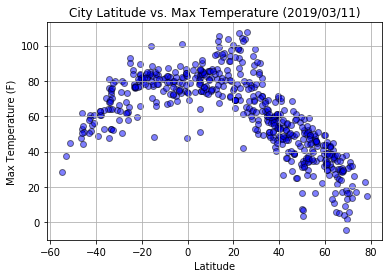

In [9]:

# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2019/03/11)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat vs Temp Plot.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

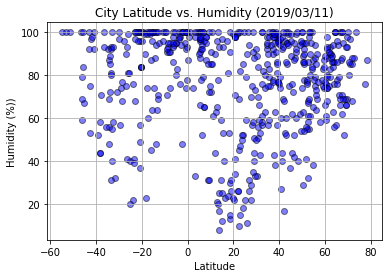

In [10]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Humidity"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2019/03/11)")
plt.ylabel("Humidity (%))")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat vs Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

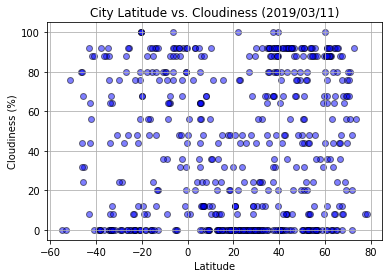

In [11]:
# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2019/03/11)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat vs Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

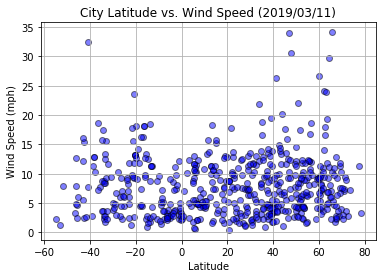

In [12]:

# Build a scatter plot for each data type
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker="o",c="b",edgecolors="black", alpha=0.5)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2019/03/11)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Lat vs Wind Speed.png")

# Show plot
plt.show()